In [ ]:
!mkdir -p /root/.config/kaggle

In [ ]:
with open('/root/.config/kaggle/kaggle.json', 'w') as f:
    f.write('{"username":"joshi29","key":"99d0805615a153c43341c48c2216e382"}')
!chmod 600 /root/.config/kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c diabetic-retinopathy-detection -f sample.zip
!kaggle competitions download -c diabetic-retinopathy-detection -f trainLabels.csv
!kaggle competitions download -c diabetic-retinopathy-detection -f train.zip.001
!kaggle competitions download -c diabetic-retinopathy-detection -f train.zip.002
!kaggle competitions download -c diabetic-retinopathy-detection -f train.zip.003
!unzip sample.zip -d sample_images
!unzip 'train.zip.*' -d train_images

 87% 9.00M/10.4M [00:00<00:00, 38.1MB/s]
100% 10.4M/10.4M [00:00<00:00, 35.2MB/s]
404 - Not Found - Not found
100% 7.80G/7.81G [00:46<00:00, 230MB/s]
100% 7.81G/7.81G [00:46<00:00, 179MB/s]
100% 7.80G/7.81G [00:54<00:00, 333MB/s]
100% 7.81G/7.81G [00:54<00:00, 154MB/s]
100% 7.80G/7.81G [01:22<00:00, 137MB/s]
100% 7.81G/7.81G [01:22<00:00, 102MB/s]
Archive:  sample.zip
   creating: sample_images/sample/
  inflating: sample_images/sample/10_left.jpeg  
  inflating: sample_images/sample/10_right.jpeg  
  inflating: sample_images/sample/13_left.jpeg  
  inflating: sample_images/sample/13_right.jpeg  
  inflating: sample_images/sample/15_left.jpeg  
  inflating: sample_images/sample/15_right.jpeg  
  inflating: sample_images/sample/16_left.jpeg  
  inflating: sample_images/sample/16_right.jpeg  
  inflating: sample_images/sample/17_left.jpeg  
  inflating: sample_images/sample/17_right.jpeg  
Archive:  train.zip.003.zip
  inflating: train_images/train.zip.003  

Archive:  train.zip.002.zip


In [ ]:
!kaggle competitions download -c diabetic-retinopathy-detection -f test.zip.001
!kaggle competitions download -c diabetic-retinopathy-detection -f test.zip.002
!kaggle competitions download -c diabetic-retinopathy-detection -f test.zip.003


100% 7.81G/7.81G [04:55<00:00, 253MB/s]
100% 7.81G/7.81G [04:55<00:00, 28.4MB/s]
100% 7.81G/7.81G [06:18<00:00, 42.2MB/s]
100% 7.81G/7.81G [06:18<00:00, 22.2MB/s]
100% 7.81G/7.81G [03:44<00:00, 25.3MB/s]
100% 7.81G/7.81G [03:44<00:00, 37.4MB/s]


In [ ]:
!mkdir test_images
!unzip 'test.zip.*' -d test_images

Archive:  test.zip.001.zip
  inflating: test_images/test.zip.001  

Archive:  test.zip.003.zip
  inflating: test_images/test.zip.003  

Archive:  test.zip.002.zip
  inflating: test_images/test.zip.002  

3 archives were successfully processed.


In [ ]:
!unzip sample.zip -d sample_images
!unzip train_combined.zip -d train_images

Archive:  sample.zip
replace sample_images/sample/10_left.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: [n]o
error:  invalid response [[n]o]
replace sample_images/sample/10_left.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_images/sample/10_left.jpeg  
replace sample_images/sample/10_right.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace sample_images/sample/10_right.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: sample_images/sample/10_right.jpeg  
  inflating: sample_images/sample/13_left.jpeg  
  inflating: sample_images/sample/13_right.jpeg  
  inflating: sample_images/sample/15_left.jpeg  
  inflating: sample_images/sample/15_right.jpeg  
  inflating: sample_images/sample/16_left.jpeg  
  inflating: sample_images/sample/16_right.jpeg  
  inflating: sample_images/sample/17_left.jpeg  
  inflating: sample_images/sample/17_right.jpeg  
unzip:  cannot find or open train_combined.zip, train_combined.zip.zip or train_combin

In [ ]:
!ls -lh train.zip.*
!mv train.zip.001.zip train.zip.001
!mv train.zip.002.zip train.zip.002
!mv train.zip.003.zip train.zip.003
!7z x train.zip.001

-rw-r--r-- 1 root root 7.9G Dec 16  2019 train.zip.001.zip
-rw-r--r-- 1 root root 7.9G Dec 16  2019 train.zip.002.zip
-rw-r--r-- 1 root root 7.9G Dec 16  2019 train.zip.003.zip

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,96 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 8391159087 bytes (8003 MiB)

Extracting archive: train.zip.001
  0% 1 Open           
train.zip
ERRORS:
Headers Error


train.zip
WARNINGS:
There are data after the end of archive

--
Path = train.zip.001
Type = Split
Physical Size = 8391159087
Volumes = 3
Total Physical Size = 25173479216
----
Path = train.zip
Size = 25173479216
--
Path = train.zip
Type = zip
ERRORS:
Headers Error
WARNINGS:
There are data after the end of archive
Physical Size = 8391159087
Tail Size = 16782320129
64-bit = +

  0%    
Would you 

In [ ]:
def count_images(directory):
    if not os.path.exists(directory):
        return 0

    image_extensions = ['.jpg', '.jpeg', '.png', '.tif']
    count = 0
    # Recursively search all subdirectories
    for root, dirs, files in os.walk(directory):
        count += sum(1 for f in files if any(f.lower().endswith(ext) for ext in image_extensions))
    return count

In [ ]:
!apt-get install p7zip-full
!7z x train.zip.001 -o/content/train_images_extracted

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,96 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 8388608000 bytes (8000 MiB)

Extracting archive: train.zip.001
  0% 1 Open           
train.zip
ERRORS:
Headers Error
Unconfirmed start of archive


train.zip
WARNINGS:
There are data after the end of archive

--
Path = train.zip.001
Type = Split
Physical Size = 8388608000
Volumes = 3
Total Physical Size = 25170928129
----
Path = train.zip
Size = 25170928129
--
Path = train.zip
Type = zip
ERRORS:
Headers Error
Unconfirmed start of archive
WARNINGS:
There are data after the end of 

In [ ]:
!7z x train.zip.002 -o/content/train_images_extracted
!7z x train.zip.003 -o/content/train_images_extracted


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,96 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 8391159780 bytes (8003 MiB)

Extracting archive: train.zip.002
--
Path = train.zip.002
Type = zip
Physical Size = 8391159780
64-bit = +

  0%      0% - train.zip.002                      1% - train.zip.002                      2% - train.zip.002                      3% - train.zip.002                      4% - train.zip.002                      5% - train.zip.002                      6% - train.zip.002                      7% - trai

In [ ]:
import os

def count_files(directory):
    if os.path.exists(directory):
        files = os.listdir(directory)
        return len(files)
    return 0

print(f"Sample images: {count_files('sample_images')}")
print(f"Training images: {count_files('train_images')}")

Sample images: 1
Training images: 3


In [ ]:
def count_images(directory):
    if not os.path.exists(directory):
        return f"Directory {directory} not found"

    image_extensions = ['.jpg', '.jpeg', '.png', '.tif']
    files = os.listdir(directory)
    count = sum(1 for file in files
               if any(file.lower().endswith(ext) for ext in image_extensions))

    if count == 0:
        print(f"No image files found in {directory}")
        print(f"Available files: {files[:5]}")

    return count

In [ ]:
import zipfile
import os

# Unzip the 'sample.zip' file
with zipfile.ZipFile('sample.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/sample/')  # Extract to a specific folder 'sample/'

# List the contents of the extracted 'sample' folder
os.listdir('/content/sample/')


['15_left.jpeg',
 '17_right.jpeg',
 'sample',
 '16_right.jpeg',
 '13_right.jpeg',
 '16_left.jpeg',
 '13_left.jpeg',
 '15_right.jpeg',
 '17_left.jpeg',
 '10_left.jpeg',
 '10_right.jpeg']

In [ ]:
!kaggle competitions download -c diabetic-retinopathy-detection

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
import zipfile
import os

# Directory containing the zip files
zip_dir = '/content/'
extract_dir = '/content/extracted/'

# Create extraction directory
os.makedirs(extract_dir, exist_ok=True)

# Extract all zip files
for file_name in os.listdir(zip_dir):
    if file_name.endswith('.zip'):
        print(f"Extracting {file_name}...")
        with zipfile.ZipFile(os.path.join(zip_dir, file_name), 'r') as zip_ref:
            zip_ref.extractall(extract_dir)

# Verify extraction
print("\nExtracted files:")
print(os.listdir(extract_dir))


Extracted files:
[]


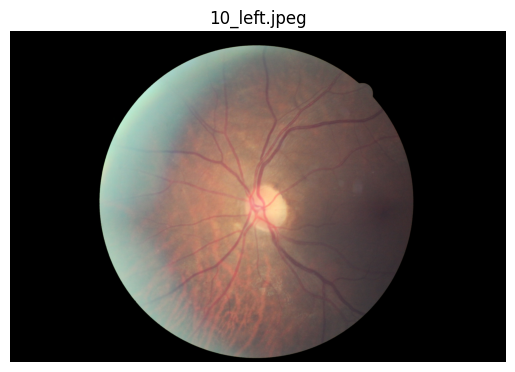

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Load and display an image, for example '10_left.jpeg'
image_path = '/content/sample/10_left.jpeg'  # Adjust the path if necessary
image = cv2.imread(image_path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off axis labels
plt.title('10_left.jpeg')
plt.show()


In [ ]:
import zipfile

# Unzipping trainLabels.csv.zip
with zipfile.ZipFile('/content/trainLabels.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')  # Extract the CSV file to /content/


In [ ]:
import pandas as pd

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/trainLabels.csv')

# Display the first few rows to check the data
df.head()
df.shape

(35126, 2)

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from glob import glob
from skimage.io import imread
from tensorflow.keras.utils import to_categorical  # Corrected import

%matplotlib inline

base_image_dir = '/content/sample/'

retina_df = pd.read_csv('/content/trainLabels.csv')

retina_df['PatientId'] = retina_df['image'].map(lambda x: x.split('_')[0])
retina_df['path'] = retina_df['image'].map(lambda x: os.path.join(base_image_dir, '{}.jpeg'.format(x)))
retina_df['exists'] = retina_df['path'].map(os.path.exists)

print(retina_df['exists'].sum(), 'images found out of', retina_df.shape[0], 'total')

retina_df['eye'] = retina_df['image'].map(lambda x: 1 if x.split('_')[-1] == 'left' else 0)

retina_df['level_cat'] = retina_df['level'].map(lambda x: to_categorical(x, num_classes=1+retina_df['level'].max()))

retina_df.dropna(inplace=True)

retina_df = retina_df[retina_df['exists']]

retina_df.sample(3)


10 images found out of 35126 total


,image,level,PatientId,path,exists,eye,level_cat
9,17_right,1,17,/content/sample/17_right.jpeg,True,0,"[0.0, 1.0, 0.0, 0.0, 0.0]"
3,13_right,0,13,/content/sample/13_right.jpeg,True,0,"[1.0, 0.0, 0.0, 0.0, 0.0]"
1,10_right,0,10,/content/sample/10_right.jpeg,True,0,"[1.0, 0.0, 0.0, 0.0, 0.0]"


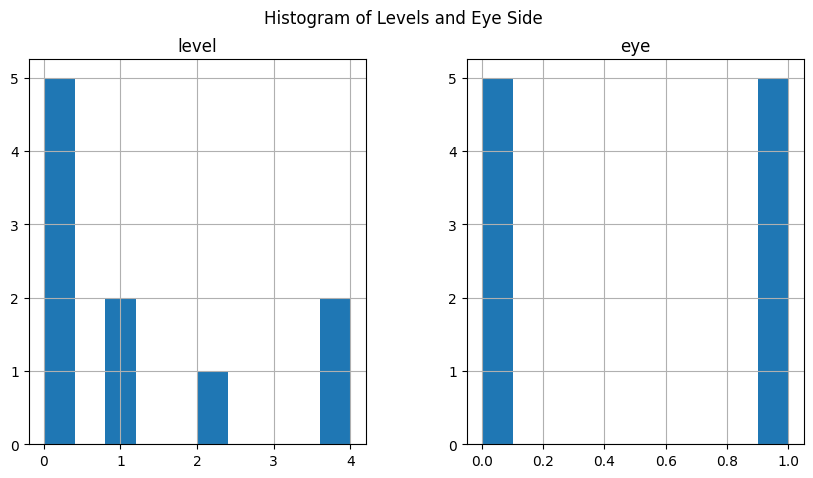

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split


retina_df[['level', 'eye']].hist(figsize=(10, 5))
plt.suptitle('Histogram of Levels and Eye Side')
plt.show()


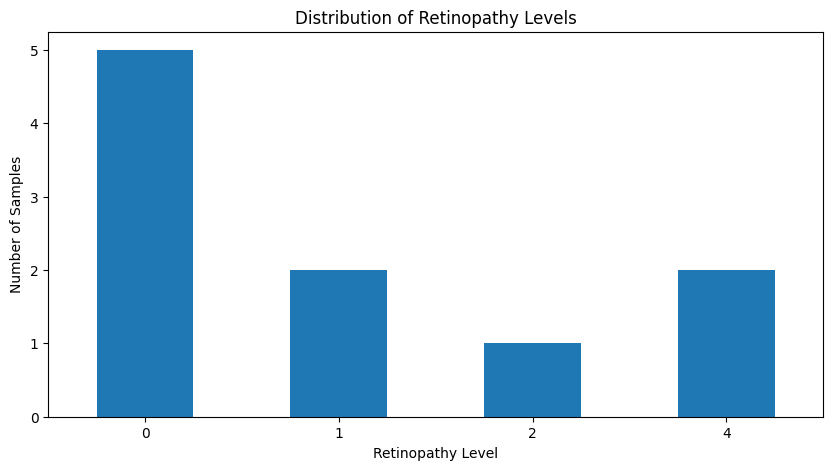

In [ ]:
# Visualize the distribution of levels
plt.figure(figsize=(10, 5))
retina_df['level'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Retinopathy Levels')
plt.xlabel('Retinopathy Level')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.show()


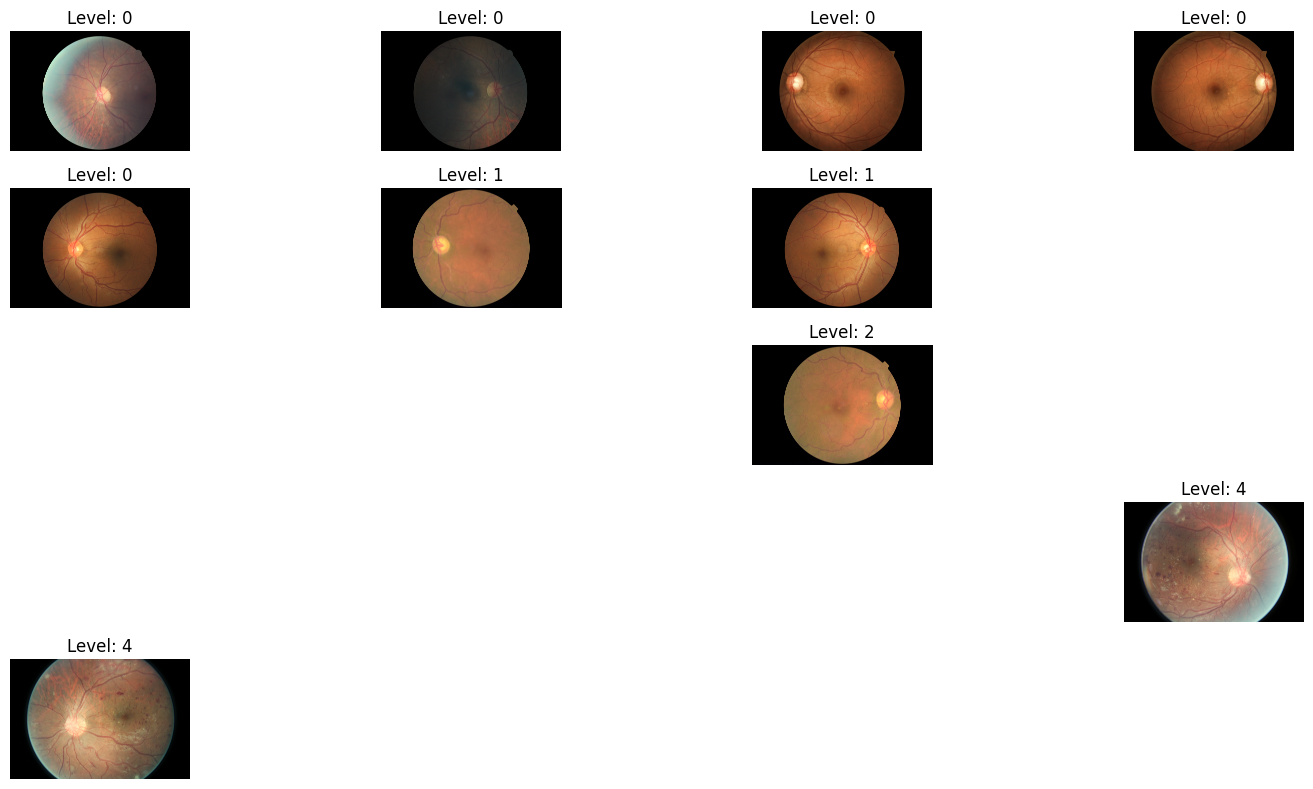

In [ ]:
# Function to display sample images from each class
def display_sample_images(df, num_images=5):
    plt.figure(figsize=(15, 8))

    for i, level in enumerate(df['level'].unique()):
        images = df[df['level'] == level]['path'].values[:num_images]
        for j, img_path in enumerate(images):
            img = imread(img_path)
            plt.subplot(num_images, len(df['level'].unique()), i * num_images + j + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'Level: {level}')

    plt.tight_layout()
    plt.show()

display_sample_images(retina_df)


In [1]:
from google.colab import drive
drive.mount('/content/drive')
input_dir = '/content/drive/MyDrive/diabetic_retinopathy_project/train_images'


Mounted at /content/drive


In [2]:
from google.colab import drive
import os

drive.mount('/content/drive')
input_dir = '/content/drive/MyDrive/diabetic_retinopathy_project/train_images/train_images'
image_files = os.listdir(input_dir)

num_images = len(image_files)

num_images


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


3662

In [3]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
import numpy as np


In [4]:
class DiabeticRetinopathyDataset(Dataset):
    def __init__(self, image_dir, label_file, transform=None):
        self.image_dir = image_dir
        self.label_file = label_file
        self.transform = transform

        # Load the labels (assumed to be in a CSV file)
        self.labels_df = pd.read_csv(label_file)

    def __len__(self):
        return len(self.labels_df)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.labels_df.iloc[idx, 0])  # assuming filename is in the first column
        image = Image.open(img_name)
        label = int(self.labels_df.iloc[idx, 1])  # assuming label is in the second column

        if self.transform:
            image = self.transform(image)

        return image, label


In [5]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 for model compatibility
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images using ImageNet stats
])


In [6]:
from torch.utils.data import Dataset
from PIL import Image
import pandas as pd

class DiabeticRetinopathyDataset(Dataset):
    def __init__(self, image_dir, csv_file, transform=None):
        self.image_dir = image_dir
        self.csv_file = csv_file
        self.transform = transform

        # Load CSV with labels
        self.data = pd.read_csv(csv_file)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = os.path.join(self.image_dir, self.data.iloc[idx, 0])  # Assuming the image file name is the first column
        image = Image.open(img_name).convert('RGB')
        label = int(self.data.iloc[idx, 1])  # Assuming the label is the second column

        if self.transform:
            image = self.transform(image)

        return image, label


In [7]:
import os

# List files in the input directory
image_files = os.listdir(input_dir)

# Display first few files to identify their extensions
image_files[:10]  # Adjust this based on the number of files you want to check


['b7ce561a7328.png',
 'b86fb2d5be1a.png',
 'b8e9a8f4617d.png',
 'b82dfa63a75f.png',
 'b7aca95b97b9.png',
 'b7a1bb106051.png',
 'b94c58d063bf.png',
 'b98f77098b9d.png',
 'b90bc89ce8d8.png',
 'b8f1b30877db.png']

In [8]:
from PIL import Image
import os

class DiabeticRetinopathyDataset(torch.utils.data.Dataset):
    def __init__(self, image_dir, csv_file, transform=None):
        self.image_dir = image_dir
        self.csv_file = csv_file
        self.transform = transform

        # Read the CSV file
        self.data = pd.read_csv(csv_file)

        self.image_files = os.listdir(image_dir)
        self.image_files = [f.split('.')[0] for f in self.image_files]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = self.data.iloc[idx, 0]
        label = self.data.iloc[idx, 1]

        img_path = os.path.join(self.image_dir, img_name + '.png')
        if not os.path.exists(img_path):
            print(f"Warning: Image file {img_path} does not exist.")

        img = Image.open(img_path)

        if self.transform:
            img = self.transform(img)

        return img, label


In [12]:
csv_file = '/content/drive/MyDrive/diabetic_retinopathy_project/train.csv'


In [13]:
dataset = DiabeticRetinopathyDataset(input_dir, csv_file, transform=transform)

for i in range(5):
    img, label = dataset[i]
    print(f"Sample {i}:")
    print(f"Image size: {img.shape}, Label: {label}")


Sample 0:
Image size: torch.Size([3, 224, 224]), Label: 2
Sample 1:
Image size: torch.Size([3, 224, 224]), Label: 4
Sample 2:
Image size: torch.Size([3, 224, 224]), Label: 1
Sample 3:
Image size: torch.Size([3, 224, 224]), Label: 0
Sample 4:
Image size: torch.Size([3, 224, 224]), Label: 0


In [14]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(test_data, test_size=0.5, random_state=42)



In [15]:
from torch.utils.data import DataLoader

batch_size = 32

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)


In [16]:
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision.models as models

model = models.resnet18(pretrained=True)

model.fc = nn.Linear(model.fc.in_features, 5)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10  # Adjust based on your needs
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct_preds / total_preds

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

torch.save(model.state_dict(), 'resnet18_diabetic_retinopathy.pth')


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 171MB/s]


Epoch [1/10], Loss: 0.7688, Accuracy: 72.89%
Epoch [2/10], Loss: 0.5703, Accuracy: 78.76%
Epoch [3/10], Loss: 0.4981, Accuracy: 80.88%
Epoch [4/10], Loss: 0.4434, Accuracy: 82.96%
Epoch [5/10], Loss: 0.4007, Accuracy: 84.88%
Epoch [6/10], Loss: 0.3820, Accuracy: 85.39%
Epoch [7/10], Loss: 0.3193, Accuracy: 88.02%
Epoch [8/10], Loss: 0.2849, Accuracy: 88.84%
Epoch [9/10], Loss: 0.2302, Accuracy: 91.60%
Epoch [10/10], Loss: 0.1893, Accuracy: 93.10%


In [17]:
model.eval()  # Set the model to evaluation mode
correct_preds = 0
total_preds = 0

with torch.no_grad():  # No need to compute gradients for evaluation
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)

val_accuracy = 100 * correct_preds / total_preds
print(f"Validation Accuracy: {val_accuracy:.2f}%")

# Test the model
correct_preds = 0
total_preds = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)

        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)

test_accuracy = 100 * correct_preds / total_preds
print(f"Test Accuracy: {test_accuracy:.2f}%")


Validation Accuracy: 78.14%
Test Accuracy: 81.47%


Epoch [1/10], Loss: 0.1657, Accuracy: 94.54%
Validation Accuracy: 75.14%
Epoch [2/10], Loss: 0.1309, Accuracy: 95.49%
Validation Accuracy: 79.78%
Epoch [3/10], Loss: 0.1144, Accuracy: 97.13%
Validation Accuracy: 78.96%
Epoch [4/10], Loss: 0.0852, Accuracy: 97.92%
Validation Accuracy: 79.78%
Epoch [5/10], Loss: 0.0737, Accuracy: 98.05%
Validation Accuracy: 79.23%
Epoch [6/10], Loss: 0.0784, Accuracy: 97.95%
Validation Accuracy: 74.04%
Epoch [7/10], Loss: 0.0601, Accuracy: 98.12%
Validation Accuracy: 79.23%
Epoch [8/10], Loss: 0.0774, Accuracy: 97.75%
Validation Accuracy: 77.60%
Epoch [9/10], Loss: 0.0931, Accuracy: 97.03%
Validation Accuracy: 76.23%
Epoch [10/10], Loss: 0.0935, Accuracy: 96.86%
Validation Accuracy: 73.77%


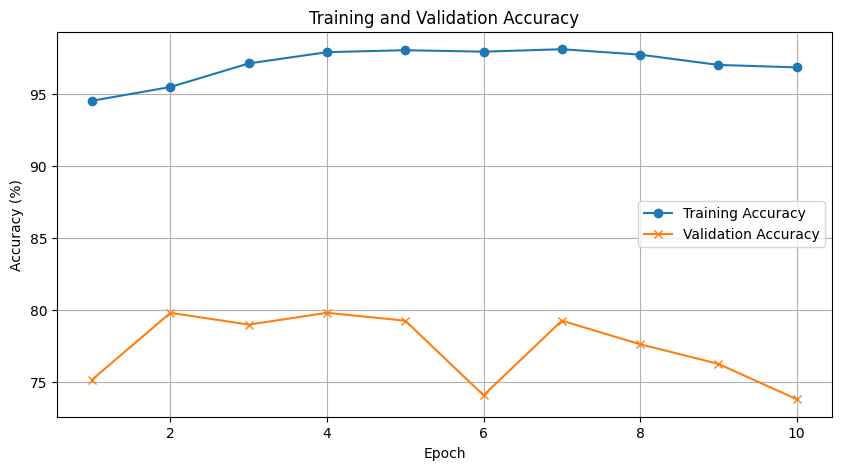

In [18]:
import matplotlib.pyplot as plt

# Initialize lists to store accuracy values
train_accuracies = []
val_accuracies = []

# Training loop
num_epochs = 10  # Adjust based on your needs
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Optimize
        optimizer.step()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)

        # Accumulate loss
        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct_preds / total_preds
    train_accuracies.append(epoch_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")

    # Validation loop
    model.eval()
    correct_preds = 0
    total_preds = 0

    with torch.no_grad():  # No need to compute gradients for evaluation
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            correct_preds += (predicted == labels).sum().item()
            total_preds += labels.size(0)

    val_accuracy = 100 * correct_preds / total_preds
    val_accuracies.append(val_accuracy)
    print(f"Validation Accuracy: {val_accuracy:.2f}%")

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
import torch
from torch.utils.data import DataLoader

def get_validation_accuracy(model, val_loader, device):
    model.eval()  # Set the model to evaluation mode
    correct_preds = 0
    total_preds = 0

    with torch.no_grad():  # No need to compute gradients for evaluation
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)

            _, predicted = torch.max(outputs, 1)
            correct_preds += (predicted == labels).sum().item()
            total_preds += labels.size(0)

    val_accuracy = 100 * correct_preds / total_preds
    return val_accuracy


best_val_acc = 0.0
epochs_without_improvement = 0
patience = 3  # Number of epochs to wait for improvement
num_epochs = 10  # Example: number of epochs you want to train for
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the parameter gradients

        outputs = model(inputs)

        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    val_accuracy = get_validation_accuracy(model, val_loader, device)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        epochs_without_improvement = 0
        torch.save(model.state_dict(), 'best_model.pth')  # Save best model
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement >= patience:
        print("Early stopping triggered.")
        break


Epoch [1/10], Loss: 0.0859, Validation Accuracy: 77.05%
Epoch [2/10], Loss: 0.0622, Validation Accuracy: 76.50%
Epoch [3/10], Loss: 0.0453, Validation Accuracy: 78.14%
Epoch [4/10], Loss: 0.0356, Validation Accuracy: 76.50%
Epoch [5/10], Loss: 0.0340, Validation Accuracy: 78.96%
Epoch [6/10], Loss: 0.0241, Validation Accuracy: 79.23%
Epoch [7/10], Loss: 0.0202, Validation Accuracy: 79.78%
Epoch [8/10], Loss: 0.0186, Validation Accuracy: 78.69%
Epoch [9/10], Loss: 0.0188, Validation Accuracy: 78.96%
Epoch [10/10], Loss: 0.0179, Validation Accuracy: 79.51%
Early stopping triggered.


In [20]:
import torch
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Random crop and resize to 224x224
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomRotation(20),  # Random rotation by 20 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Random color jitter
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization (using ImageNet stats)
])

val_test_transform = transforms.Compose([
    transforms.Resize(256),  # Resize to 256x256
    transforms.CenterCrop(224),  # Crop the center of the image to 224x224
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization
])

train_dataset = DiabeticRetinopathyDataset(input_dir, csv_file, transform=train_transform)
val_dataset = DiabeticRetinopathyDataset(input_dir, csv_file, transform=val_test_transform)
test_dataset = DiabeticRetinopathyDataset(input_dir, csv_file, transform=val_test_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



Epoch [1/10], Loss: 1.4018, Training Accuracy: 55.76%
Validation Accuracy: 61.91%
Epoch [2/10], Loss: 0.9999, Training Accuracy: 65.40%
Validation Accuracy: 66.03%
Epoch [3/10], Loss: 0.9234, Training Accuracy: 67.39%
Validation Accuracy: 74.36%
Epoch [4/10], Loss: 0.8585, Training Accuracy: 69.83%
Validation Accuracy: 74.55%
Epoch [5/10], Loss: 0.8269, Training Accuracy: 70.04%
Validation Accuracy: 75.89%
Epoch [6/10], Loss: 0.7918, Training Accuracy: 71.55%
Validation Accuracy: 76.08%
Epoch [7/10], Loss: 0.8097, Training Accuracy: 70.62%
Validation Accuracy: 74.41%
Epoch [8/10], Loss: 0.7823, Training Accuracy: 71.63%
Validation Accuracy: 75.01%
Epoch [9/10], Loss: 0.7667, Training Accuracy: 70.78%
Validation Accuracy: 76.13%
Epoch [10/10], Loss: 0.7554, Training Accuracy: 72.09%
Validation Accuracy: 78.56%


<ipython-input-21-b7421097f55b>:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


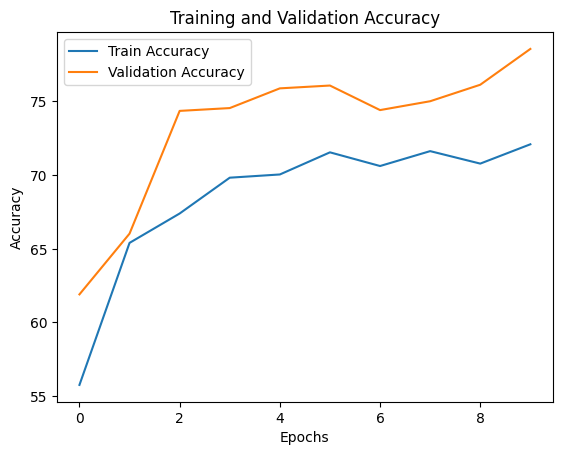

In [21]:
import torch
import matplotlib.pyplot as plt

best_val_acc = 0.0
epochs_without_improvement = 0
patience = 3
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    correct_preds = 0
    total_preds = 0
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        correct_preds += (predicted == labels).sum().item()
        total_preds += labels.size(0)
        running_loss += loss.item()

    train_accuracy = 100 * correct_preds / total_preds
    train_loss = running_loss / len(train_loader)
    train_accuracies.append(train_accuracy)

    model.eval()
    correct_preds = 0
    total_preds = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_preds += (predicted == labels).sum().item()
            total_preds += labels.size(0)

    val_accuracy = 100 * correct_preds / total_preds
    val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%")
    print(f"Validation Accuracy: {val_accuracy:.2f}%")

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        epochs_without_improvement = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement >= patience:
        print("Early stopping triggered.")
        break

model.load_state_dict(torch.load('best_model.pth'))

plt.plot(range(len(train_accuracies)), train_accuracies, label='Train Accuracy')
plt.plot(range(len(val_accuracies)), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [22]:
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),  # Compress dimensions
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()  # Output between 0 and 1 for normalized images
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [23]:
autoencoder = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=1e-3)

num_epochs = 10
for epoch in range(num_epochs):
    autoencoder.train()
    running_loss = 0.0

    for inputs, _ in train_loader:
        inputs = inputs.to(device)

        optimizer.zero_grad()

        _, outputs = autoencoder(inputs)  # Encode and decode
        loss = criterion(outputs, inputs)  # Reconstruction loss
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")


Epoch [1/10], Loss: 1.5485
Epoch [2/10], Loss: 1.4116
Epoch [3/10], Loss: 1.4148
Epoch [4/10], Loss: 1.4123
Epoch [5/10], Loss: 1.4195
Epoch [6/10], Loss: 1.4087
Epoch [7/10], Loss: 1.4189
Epoch [8/10], Loss: 1.4250
Epoch [9/10], Loss: 1.4094
Epoch [10/10], Loss: 1.4072


In [24]:
class EncodedDiabeticRetinopathyDataset(DiabeticRetinopathyDataset):
    def __init__(self, encoder, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.encoder = encoder
        self.encoder.eval()  # Use encoder in evaluation mode

    def __getitem__(self, idx):
        img, label = super().__getitem__(idx)
        with torch.no_grad():
            img = img.unsqueeze(0).to(device)  # Add batch dimension
            encoded, _ = self.encoder(img)
            encoded = encoded.squeeze(0)  # Remove batch dimension
        return encoded, label


In [27]:
# Initialize the encoded dataset
encoded_dataset = EncodedDiabeticRetinopathyDataset(autoencoder.encoder, input_dir, csv_file, transform=transform)
encoded_train_loader = DataLoader(encoded_dataset, batch_size=32, shuffle=True)


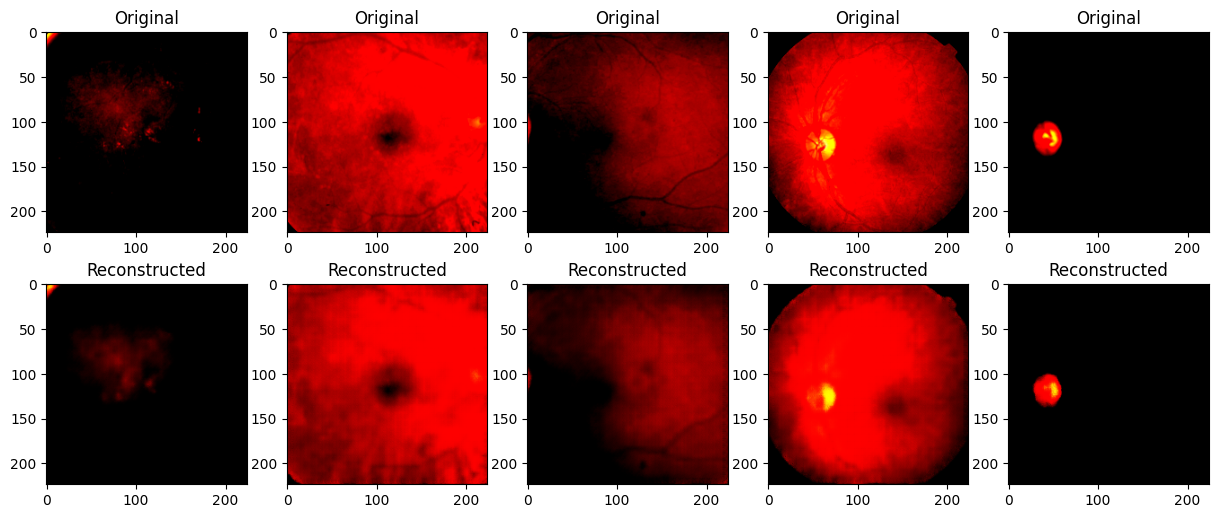

In [26]:
import matplotlib.pyplot as plt

autoencoder.eval()
inputs, _ = next(iter(val_loader))
inputs = inputs.to(device)

_, reconstructed = autoencoder(inputs)

# Plot original and reconstructed images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i in range(5):
    axes[0, i].imshow(inputs[i].cpu().permute(1, 2, 0))  # Original image
    axes[0, i].set_title("Original")
    axes[1, i].imshow(reconstructed[i].cpu().permute(1, 2, 0).detach())  # Reconstructed image
    axes[1, i].set_title("Reconstructed")
plt.show()


In [30]:
encoded_features = []
labels_list = []

for inputs, labels in train_loader:
    inputs = inputs.to(device)
    encoded = autoencoder.encoder(inputs)  # Pass through encoder
    encoded_features.append(encoded.cpu().detach())  # Store encoded features
    labels_list.append(labels)

encoded_train_features = torch.cat(encoded_features)
train_labels = torch.cat(labels_list)


In [35]:
# Autoencoder Encoding and Flattening (with .detach())
encoded_train_features = []
train_labels_list = []

for inputs, labels in train_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    encoded = autoencoder.encoder(inputs)
    encoded = encoded.view(encoded.size(0), -1).detach()  # Detach the tensor from the graph
    encoded_train_features.append(encoded)
    train_labels_list.append(labels)

# Concatenate all encoded features and labels
encoded_train_features = torch.cat(encoded_train_features, dim=0)
train_labels = torch.cat(train_labels_list, dim=0)

# Determine input_dim dynamically
input_dim = encoded_train_features.shape[1]
print("Final input_dim for classifier:", input_dim)

# Define classifier
classifier = Classifier(input_dim, num_classes).to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001)

# Train the classifier
num_epochs = 10
for epoch in range(num_epochs):
    classifier.train()
    optimizer.zero_grad()

    outputs = classifier(encoded_train_features.to(device))  # Pass flattened features
    loss = criterion(outputs, train_labels.to(device))

    loss.backward()  # Backpropagation
    optimizer.step()  # Update parameters

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Final input_dim for classifier: 200704
Epoch [1/10], Loss: 2.5548
Epoch [2/10], Loss: 675.8464
Epoch [3/10], Loss: 902.5875
Epoch [4/10], Loss: 630.1276
Epoch [5/10], Loss: 466.1603
Epoch [6/10], Loss: 545.0534
Epoch [7/10], Loss: 483.6023
Epoch [8/10], Loss: 324.6364
Epoch [9/10], Loss: 333.3607
Epoch [10/10], Loss: 459.0642


In [37]:
def evaluate_accuracy(classifier, encoded_features, labels):
    classifier.eval()
    with torch.no_grad():
        outputs = classifier(encoded_features.to(device))  # Move features to device
        _, predicted = torch.max(outputs, 1)  # Get predicted labels
        accuracy = (predicted == labels.to(device)).sum().item() / len(labels) * 100  # Compute accuracy
    return accuracy

encoded_val_features = []
val_labels_list = []

for inputs, labels in val_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    encoded = autoencoder.encoder(inputs)  # Encode with autoencoder
    encoded = encoded.view(encoded.size(0), -1).detach()  # Flatten and detach
    encoded_val_features.append(encoded)
    val_labels_list.append(labels)

encoded_val_features = torch.cat(encoded_val_features, dim=0)  # Combine all batches
val_labels = torch.cat(val_labels_list, dim=0)

encoded_test_features = []
test_labels_list = []

for inputs, labels in test_loader:
    inputs, labels = inputs.to(device), labels.to(device)
    encoded = autoencoder.encoder(inputs)  # Encode with autoencoder
    encoded = encoded.view(encoded.size(0), -1).detach()  # Flatten and detach
    encoded_test_features.append(encoded)
    test_labels_list.append(labels)

encoded_test_features = torch.cat(encoded_test_features, dim=0)  # Combine all batches
test_labels = torch.cat(test_labels_list, dim=0)

val_accuracy = evaluate_accuracy(classifier, encoded_val_features, val_labels)
print(f"Validation Accuracy: {val_accuracy:.2f}%")

test_accuracy = evaluate_accuracy(classifier, encoded_test_features, test_labels)
print(f"Test Accuracy: {test_accuracy:.2f}%")


Validation Accuracy: 27.28%
Test Accuracy: 27.28%
